In [57]:
import torch
import torch.nn.functional as F
from task.TaskGenerator import SinTaskGenerator
import matplotlib.pyplot as plt

In [2]:
class EncoderRec(torch.nn.Module):
    def __init__(self):
        super(EncoderRec, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc31 = torch.nn.Linear(16, 3)
        self.enc32 = torch.nn.Linear(16, 3)
        
    def encode(self, context):
        seq_len = context.shape[0]
        t = F.relu(self.enc1(context)).view(1, seq_len, 16)
        t = self.enc2(t)[0][0][-1, :] # we are interested only in the last output of the sequence
        t = F.relu(t)
        return self.enc31(t), self.enc32(t)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def forward(self, context):
        mu, logvar = self.encode(context)
        z = self.reparameterize(mu, logvar)
        return z

In [ ]:
# The idea of this is to retrieve the context with a recurrent part, in order to handle the generation of

class RecurrentContextVae(torch.nn.Module):
    
    def __init__(self):
        super(RecurrentContextVae, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc31 = torch.nn.Linear(16, 3)
        self.enc32 = torch.nn.Linear(16, 3)
        
        self.dec1 = torch.nn.Linear(3 + 1, 256)
        self.dec2 = torch.nn.Linear(256, 128)
        self.dec3 = torch.nn.Linear(128, 32)
        self.dec4 = torch.nn.Linear(32, 1)
    
    def encode(self, context):
        seq_len = context.shape[0]
        t = F.relu(self.enc1(context)).view(1, seq_len, 16)
        t = self.enc2(t)[0][0][-1, :] # we are interested only in the last output of the sequence
        t = F.relu(t)
        return self.enc31(t), self.enc32(t)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.dec1(z))
        h = F.relu(self.dec2(h))
        h = F.relu(self.dec3(h))
        return self.dec4(h)
    
    def forward(self, x, context):
        mu, logvar = self.encode(context)
        z = self.reparameterize(mu, logvar)
        
        if len(x.shape) > 1:
            z = z.repeat(x.shape[0], 1)
            z = torch.cat([z, x[:, 0:1]], dim=1)
        else:
            z = torch.cat([z, x[0:1]])    
        return self.decode(z), mu, logvar

        

In [244]:
# The idea of this is to retrieve the context with a recurrent part, in order to handle the generation of

class RecurrentContextVae(torch.nn.Module):
    
    def __init__(self):
        super(RecurrentContextVae, self).__init__()
        self.enc1 = torch.nn.Linear(2, 16)
        self.enc2 = torch.nn.GRU(input_size=16, hidden_size=16, num_layers=2, batch_first=True)
        self.enc31 = torch.nn.Linear(16, 3)
        self.enc32 = torch.nn.Linear(16, 3)
        
        self.dec1 = torch.nn.Linear(3 + 1, 128)
        self.dec2 = torch.nn.Linear(128, 64)
        self.dec3 = torch.nn.Linear(64, 32)
        self.dec4 = torch.nn.Linear(32, 1)
    
    def encode(self, context):
        seq_len = context.shape[0]
        t = F.relu(self.enc1(context)).view(1, seq_len, 16)
        t = self.enc2(t)[0][0][-1, :] # we are interested only in the last output of the sequence
        t = F.relu(t)
        return self.enc31(t), self.enc32(t)
        
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.dec1(z))
        h = F.relu(self.dec2(h))
        h = F.relu(self.dec3(h))
        return self.dec4(h)
    
    def forward(self, x, context):
        mu, logvar = self.encode(context)
        z = self.reparameterize(mu, logvar)
        
        if len(x.shape) > 1:
            z = z.repeat(x.shape[0], 1)
            z = torch.cat([z, x[:, 0:1]], dim=1)
        else:
            z = torch.cat([z, x[0:1]])    
        return self.decode(z), mu, logvar

        

In [27]:
class ContextNet(torch.nn.Module):
    def __init__(self):
        super(ContextNet, self).__init__()
        self.l1 = torch.nn.Linear(4, 512)
        self.l2 = torch.nn.Linear(512, 128)
        self.l3 = torch.nn.Linear(128, 64)
        self.l4 = torch.nn.Linear(64, 16)
        self.l5 = torch.nn.Linear(16, 1)
    
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        x = self.l5(x)
        return x

In [28]:
class Context_VAE(torch.nn.Module):
    def __init__(self):
        super(Context_VAE, self).__init__()

        self.enc1 = torch.nn.Linear(40, 128)
        self.enc2 = torch.nn.Linear(128, 64)
        self.enc3 = torch.nn.Linear(64, 32)
        self.enc41 = torch.nn.Linear(32, 7)
        self.enc42 = torch.nn.Linear(32, 7)
        
        self.dec1 = torch.nn.Linear(7 + 1, 128)
        self.dec2 = torch.nn.Linear(128, 64)
        self.dec3 = torch.nn.Linear(64, 32)
        self.dec4 = torch.nn.Linear(32, 1)
        
    def encode(self, context):
        h = F.relu(self.enc1(context))
        h = F.relu(self.enc2(h))
        h = F.relu(self.enc3(h))
        return self.enc41(h), self.enc42(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.dec1(z))
        h = F.relu(self.dec2(h))
        h = F.relu(self.dec3(h))
        return self.dec4(h)

    def forward(self, x, context):
        for t in context:
            mu, logvar = self.encode(context)
        z = self.reparameterize(mu, logvar)
        
        if len(x.shape) > 1:
            z = torch.cat([z, x[:, 0:1]], dim=1)
        else:
            z = torch.cat([z, x[0:1]])    
        return self.decode(z), mu, logvar

In [29]:
class VAE(torch.nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        self.enc1 = torch.nn.Linear(2, 512)
        self.enc2 = torch.nn.Linear(512, 256)
        self.enc3 = torch.nn.Linear(256, 64)
        self.enc41 = torch.nn.Linear(64, 3)
        self.enc42 = torch.nn.Linear(64, 3)
        
        self.dec1 = torch.nn.Linear(3 + 1, 512)
        self.dec2 = torch.nn.Linear(512, 128)
        self.dec3 = torch.nn.Linear(128, 64)
        self.dec4 = torch.nn.Linear(64, 1)
        
    def encode(self, x):
        h = F.relu(self.enc1(x))
        h = F.relu(self.enc2(h))
        h = F.relu(self.enc3(h))
        return self.enc41(h), self.enc42(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h = F.relu(self.dec1(z))
        h = F.relu(self.dec2(h))
        h = F.relu(self.dec3(h))
        return self.dec4(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        
        if len(x.shape) > 1:
            z = torch.cat([z, x[:, 0:1]], dim=1)
        else:
            z = torch.cat([z, x[0:1]])    
        return self.decode(z), mu, logvar

In [30]:
model = ContextNet()
optimizer = torch.optim.Adam(model.parameters())

In [31]:
def loss_function(recon_f, f, mu, logvar):
    MSE = F.mse_loss(recon_f, f)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    
    return MSE + KLD

def mse_loss(y_hat, y):
    return F.mse_loss(y_hat, y)

In [53]:
task_gen = SinTaskGenerator(x_min=-5, x_max=5)
dataset = []

# Task parameters range
max_a = 0.5
min_a = 10

min_phase = -1
max_phase = 1

min_freq = 1
max_freq = 5

# Function to create dataset of random parameters in the range
def sample_task(n_batches=10, test_perc=0, batch_size=128):
    a = (min_a - max_a) * torch.rand(1) + max_a
    phase = (min_phase - max_phase) * torch.rand(1) + max_phase
    f = (min_freq - max_freq) * torch.rand(1) + max_freq
    
    
    data = task_gen.get_data_loader(amplitude=a, 
                                    phase=phase,
                                    frequency=f,
                                    num_batches=n_batches,
                                    test_perc=test_perc, 
                                    batch_size=batch_size)

    return data, a, phase, f

# Dataset creation
n_tasks = 1000
data_set = []
a_set = []
phase_set = []
f_set = []
for _ in range(n_tasks):
    data, a, phase, f = sample_task(n_batches=1, test_perc=0, batch_size=128)
    data_set.append(data)
    a_set.append(a)
    phase_set.append(phase)
    f_set.append(f)

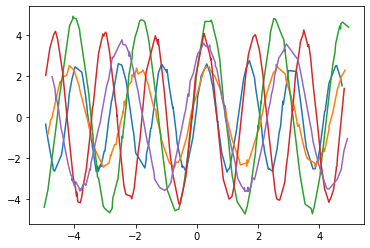

In [33]:
# Task visualization
idxes = [0,1,2,3,4]
for i in idxes:
    data = data_set[i][0]
    data = data['train']
    x = data[0]
    y = data[1]
    
    idx = x.squeeze(1).sort().indices
    plt.plot(x[idx],y[idx])

In [36]:
train_data_set = data_set[0:800]
valid_data_set = data_set[800:]
n_tasks = 800


def train_encoder_rnn(epoch, n_iter=10):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    freq = f_set[task_idx] 
    phase = phase_set[task_idx]
    amp = a_set[task_idx]
    data = data_set[task_idx][0]['train']
    data = torch.cat([data[0], data[1]], dim=1)
    z = torch.cat([freq, phase, amp])
    
    for _ in range(n_iter):
        num_data_context = torch.randint(low=15, high=25, size=(1,)).item()
        idx = torch.randint(0, 128, (128,))
        ctx_idx = idx[0:num_data_context]
        context = data[ctx_idx]

        optimizer.zero_grad()
        z_hat = model(context=context)
        loss = mse_loss(z_hat, z)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    return train_loss / (n_iter+1)
        

def train(epoch):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    data_loader = data_set[task_idx]
    
    for batch_idx, batch in enumerate(data_loader):
        batch = batch['train']
        f = batch[1]
        batch = torch.cat([batch[0], batch[1]], dim=1)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(batch)
        loss = loss_function(recon_batch, f, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    return train_loss / (batch_idx+1)

def train_rec_vae(epoch, n_iter):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    data_loader = data_set[task_idx]
    
    for _ in range(n_iter):
        for batch_idx, batch in enumerate(data_loader):
            num_data_context = torch.randint(low=10, high=30, size=(1,)).item()
            batch = batch['train']
            idx = torch.randint(0, 128, (128,))
            ctx_idx = idx[0:num_data_context]
            x_idx = idx[num_data_context:]

            f = batch[1][x_idx]
            batch = torch.cat([batch[0], batch[1]], dim=1)
            x = batch[x_idx]
            context = batch[ctx_idx]

            optimizer.zero_grad()
            recon_batch, mu, logvar = model(x=x, context=context)
            loss = loss_function(recon_batch, f, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
    return train_loss / (n_iter*(batch_idx+1))
    
    
# Context_Vae Model training iteration on a single task sampled randomly
def train_context_vae(epoch):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    data_loader = data_set[task_idx]
    
    for batch_idx, batch in enumerate(data_loader):
        batch = batch['train']
        f = batch[1][20:]
        batch = torch.cat([batch[0], batch[1]], dim=1)
        x = batch[20:]
        n_rows = x.shape[0]
        context = batch[0:20].flatten()
        context = context.repeat(n_rows, 1)
        
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(x=x, context=context)
        loss = loss_function(recon_batch, f, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    return train_loss / (batch_idx+1)

# Def train network that takes in input known tasks parameters
def train_context_net(epoch):
    model.train()
    train_loss = 0
    task_idx = torch.randint(low=0, high=n_tasks, size=(1,)).item()
    data_loader = data_set[task_idx]
    a = a_set[task_idx]
    phase = phase_set[task_idx]
    f = f_set[task_idx]
    
    for batch_idx, batch in enumerate(data_loader):
        batch = batch['train']
        y = batch[1]
        x = batch[0]
        context = torch.cat([a,phase,f])
        context = context.repeat(128,1)
        x = torch.cat([x, context], dim=1)

        optimizer.zero_grad()
        y_hat = model(x)
        loss = mse_loss(y_hat=y_hat, y=y)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    return train_loss / (batch_idx+1)

In [54]:
n_epochs = 1000
#losses = []
#l_sum = 0
for i in range(n_epochs):
    l = train_context_net(i)
    l_sum += l
    losses.append(l)
    if i % 100 == 0:
        print('====> Epoch: {} Average loss: {:.4f}'.format(i, l))

====> Epoch: 0 Average loss: 0.7251
====> Epoch: 100 Average loss: 0.3068
====> Epoch: 200 Average loss: 0.1501
====> Epoch: 300 Average loss: 0.3029
====> Epoch: 400 Average loss: 0.5871
====> Epoch: 500 Average loss: 0.2782
====> Epoch: 600 Average loss: 0.0441
====> Epoch: 700 Average loss: 0.1012
====> Epoch: 800 Average loss: 0.3900


KeyboardInterrupt: 

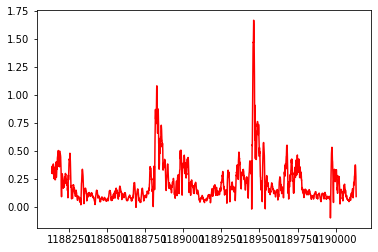

In [56]:
import numpy as np
from scipy.signal import savgol_filter
y = np.array(losses)
x = np.arange(len(y))
yhat = savgol_filter(y, 21, 3) 

plt.plot(x[-2000:], yhat[-2000:], color='red')
plt.show()

In [243]:
torch.save(model.state_dict(), ".modaaael")

In [22]:
# Plot results
task_index = 8
batch = data_set[task_index][0]['train']
f = batch[1][20:]
batch = torch.cat([batch[0], batch[1]], dim=1)
x = batch
context = batch[0:20]

idx = data_set[task_index][0]['train'][0].squeeze(1).sort().indices
plt.plot(x[:, 0][idx], model(x, context)[0][idx].detach())
plt.plot(data_set[task_index][0]['train'][0][idx],  data_set[task_index][0]['train'][1][idx])

TypeError: forward() takes 2 positional arguments but 3 were given

### Ideas
- MAML with additional input on the predictions of the current network... The problem of this approach is that somehow it has to learn a place in the parameter space that might be good for all the possible tasks variations and this might be too demanding.
- Inference on task variations and generate new data to enhance the meta-learning updates. The basic idea is to train a VAE in order to infer task variations? How can we do that? We should have a VAE that uses as context the information on the current tasks that he is observing + the predictions of the network for the previous tasks. Then, once you are able to generate correct samples, we can meta-train a model to have better updates -> Let's try this idea first